In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime

* Setting up ability to import functions from src folder

In [2]:
sys.path.insert(
    0, "/home/cameronwills/ddimil12/projects/midterm/gtd_exploration")

In [3]:
from src import clean_data as cd

* Reads in the full_data csv
* Sets low_memory to false to better interpret the values in the columns, since there is a lot of mixed data types in the csv

In [4]:
world_df = pd.read_csv("../data/full_data.csv", index_col=0, low_memory=False)

* Makes a copy of the original df, with only the United States data

In [5]:
usa_df = world_df[world_df["country_txt"] == "United States"].copy()

* Creates a new column 'date' that is of data type datetime

In [7]:
usa_df["date"] = cd.create_date_column(usa_df)

* Top 5 terrorist groups that attack the US

In [15]:
top_5_groups = usa_df.groupby("gname")["gname"].count().sort_values(ascending=False).iloc[:5]

<Axes: title={'center': 'Top 5 groups that attack the most (1970 - 2020)'}, xlabel='count', ylabel='group name'>

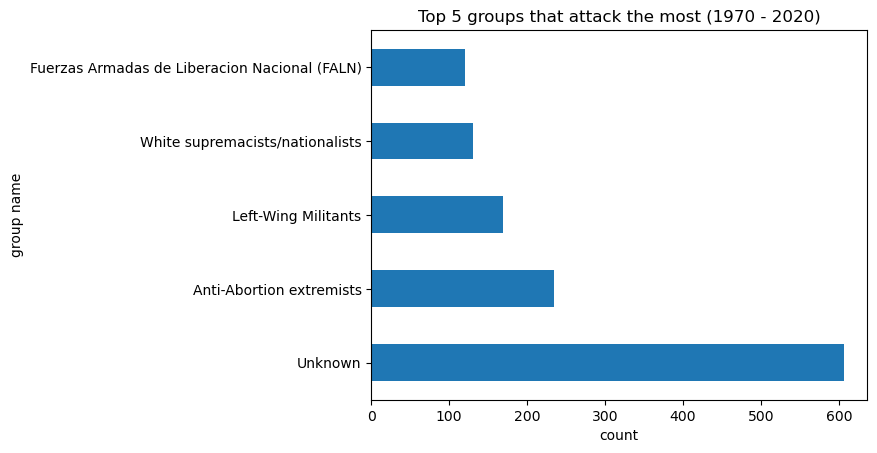

In [21]:
top_5_groups.plot.barh(title="Top 5 groups that attack the most (1970 - 2020)",
                       ylabel="group name", xlabel="count")

* Timeline for each group

In [43]:
groups = top_5_groups.index.values
query = usa_df["gname"].isin(groups)
top_5_df = usa_df[query]
top_5_timeline = top_5_df.groupby(["gname", "year"])["year"].count()

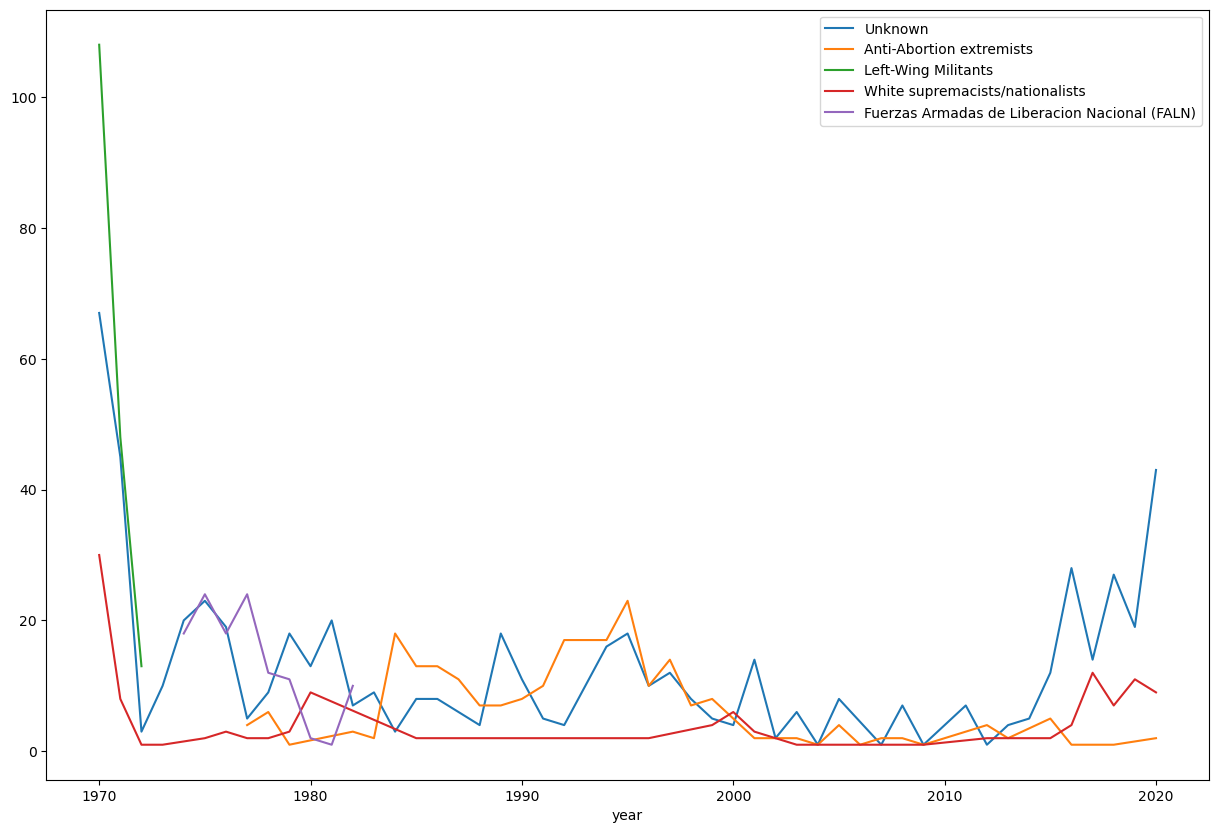

In [71]:
for group in groups:
    top_5_timeline[group].plot.line(legend=True, label=group, figsize=(15,10))

In [76]:
query = top_5_df["gname"].str.match("Left-Wing Militants")
top_5_df[query]["year"].value_counts()

year
1970    108
1971     48
1972     13
Name: count, dtype: int64